In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/dq-blog-files/fortune500.csv")

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.columns

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.columns

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')

In [6]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [7]:
len(df)

25500

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [9]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [10]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [11]:
len(df.profit[non_numeric_profits])

369

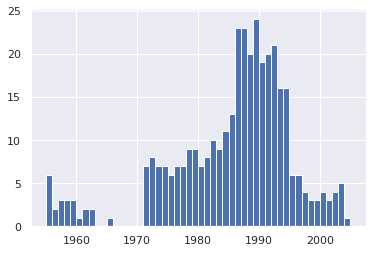

In [12]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

In [13]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [14]:
len(df)

25131

In [15]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [16]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

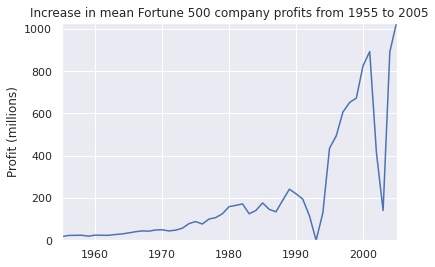

In [17]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')